In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
#Parameters


#MACD parameters
n = 9
m = 19
t = 6

#RSI parameters
period = 14

In [48]:
dataimport = pd.read_csv('/Users/hitengoel/Machine Learning/data analysis(technical indiactors)/data-analysis-with-technical-indicators/Pair Trading final/preprocessing/Nifty_50.csv')


dataimport['Date'] = pd.to_datetime(dataimport['Date'])
dataimport.set_index('Date', inplace=True)
data = dataimport.resample('W').first()  # Weekly Resampling

data.reset_index(inplace=True)
data['Date'] = data['Date'].astype(str)
stock_names = data.columns[1:]

datacopy = data.copy()

data

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-01-09,83.153633,134.706543,439.091125,259.076141,251.916626,1036.131714,63.653694,45.593979,60.885281,...,240.419800,222.953842,446.352051,92.316086,245.710632,47.525696,139.034042,172.213837,1034.288086,159.698929
1,2011-01-16,74.924774,130.388138,446.682709,241.339020,231.093201,885.431335,58.148621,42.477810,55.848026,...,216.992065,218.241302,435.887360,86.313469,220.969604,43.924397,135.361099,153.767944,946.568054,153.599243
2,2011-01-23,78.103516,127.323494,440.269867,239.996140,226.377777,890.097961,57.267994,40.074051,54.025948,...,214.359619,212.933975,438.392639,86.851639,221.373337,42.233444,135.116898,159.999146,961.116760,154.310028
3,2011-01-30,81.487343,132.106247,484.641113,236.219772,244.198822,917.431091,57.945408,40.970615,55.465157,...,229.596161,221.787140,466.066864,87.969368,223.147934,43.826523,135.917892,166.711365,967.772949,146.755707
4,2011-02-06,72.316422,130.527466,463.705078,232.303726,228.809158,874.343567,53.059036,39.623344,56.553787,...,225.110825,201.701630,447.663940,82.339333,215.401688,43.181862,127.175156,168.208435,953.557190,145.489288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2022-12-04,3884.209229,872.732849,4702.564941,3124.898682,890.791016,3567.559570,6748.773438,1651.979370,321.788910,...,587.152405,1017.618103,3247.441650,790.030212,431.903900,101.584465,1038.492798,2583.878418,6860.942383,403.792145
622,2022-12-11,3928.437256,887.185730,4758.833496,3130.551270,898.283325,3551.258301,6632.268555,1633.339233,319.569672,...,595.545898,1022.191223,3276.757080,786.297668,427.417877,112.188362,1060.232544,2607.202881,7165.849121,410.461487
623,2022-12-18,4014.694092,875.414856,4722.930664,3139.922607,937.693176,3489.982910,6478.969727,1591.261353,329.579865,...,591.445618,971.052185,3143.377930,795.678223,412.863220,108.169533,995.013489,2576.302979,7114.334473,394.534760
624,2022-12-25,4073.264893,886.887695,4591.619629,3055.235352,945.235413,3522.003418,6658.706055,1618.197266,322.308319,...,583.148743,971.593018,3062.652588,794.499573,416.701263,108.266380,989.807434,2513.656006,7043.806641,387.268188


In [49]:
data.dtypes

Date              object
ADANIENT.NS      float64
ADANIPORTS.NS    float64
APOLLOHOSP.NS    float64
ASIANPAINT.NS    float64
AXISBANK.NS      float64
BAJAJ-AUTO.NS    float64
BAJFINANCE.NS    float64
BAJAJFINSV.NS    float64
BPCL.NS          float64
BHARTIARTL.NS    float64
BRITANNIA.NS     float64
CIPLA.NS         float64
COALINDIA.NS     float64
DIVISLAB.NS      float64
DRREDDY.NS       float64
EICHERMOT.NS     float64
GRASIM.NS        float64
HCLTECH.NS       float64
HDFCBANK.NS      float64
HEROMOTOCO.NS    float64
HINDALCO.NS      float64
HINDUNILVR.NS    float64
ICICIBANK.NS     float64
ITC.NS           float64
INDUSINDBK.NS    float64
INFY.NS          float64
JSWSTEEL.NS      float64
KOTAKBANK.NS     float64
LT.NS            float64
M&M.NS           float64
MARUTI.NS        float64
NTPC.NS          float64
NESTLEIND.NS     float64
ONGC.NS          float64
POWERGRID.NS     float64
RELIANCE.NS      float64
SHRIRAMFIN.NS    float64
SBIN.NS          float64
SUNPHARMA.NS     float64


## Strat-1 MACD + RSI

In [50]:
def MACD(price_data, short_window, long_window, signal_window, column_name):
    data = price_data
   
    data.loc[:,'EMAn'] = data[column_name].ewm(span=short_window, adjust=False).mean()
    data.loc[:,'EMAm'] = data[column_name].ewm(span=long_window, adjust=False).mean()

    for i in range(short_window):
        data.loc[i,'EMAn'] = None
    for i in range(long_window):
        data.loc[i,'EMAm'] = None
    
    data['MACD'] = data['EMAn'] - data['EMAm']
    data['Signal Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()

    trade_sig=np.zeros([len(data),1],dtype=float)

    for i in range(long_window+1,len(data)):
        if data.loc[i,'MACD'] > data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] < data.loc[i-1,'Signal Line']:
            trade_sig[i] = 1
        if data.loc[i,'MACD'] < data.loc[i,'Signal Line'] and data.loc[i-1,'MACD'] > data.loc[i-1,'Signal Line']:
            trade_sig[i] = -1
        
    trade_sig=trade_sig.reshape(len(trade_sig),1)

    data_numpy=data['Date'].to_numpy()
    data_numpy=data_numpy.reshape(len(data_numpy),1)
    data_numpy=np.column_stack((data_numpy,data[column_name].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAn'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['EMAm'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['MACD'].to_numpy()))
    data_numpy=np.column_stack((data_numpy,data['Signal Line'].to_numpy()))

    final=np.column_stack((data_numpy,trade_sig))
    final_df=pd.DataFrame(final,columns=['Date','Close','EMAn','EMAm','MACD','Signal Line','Trade Signal'],index=data.index)

    final_df.drop(["EMAn","EMAm","MACD","Signal Line"],axis=1,inplace=True)
    final_df['Date'] = pd.to_datetime(final_df['Date'])
    final_df['Close'] = final_df['Close'].astype(float) 
    final_df['Trade Signal'] = final_df['Trade Signal'].astype(int)

    return final_df


master_macd = pd.DataFrame()

for name in stock_names:
    temp = MACD(data, n, m, t, name)
    temp = temp[['Date','Trade Signal']]
    temp.columns = ['Date',name]
    temp.set_index('Date', inplace=True)
    master_macd = pd.concat([master_macd, temp], axis=1)

In [51]:
master_macd.insert(0, 'Date', master_macd.index)
master_macd.reset_index(drop=True, inplace=True)
master_macd = master_macd[period:]
master_macd = master_macd.reset_index(drop=True)
#master_macd = master_macd[232:725]
master_macd

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-04-17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-04-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-05-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-05-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-05-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2022-12-04,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
608,2022-12-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609,2022-12-18,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
610,2022-12-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
def calculate_rsi(prices, period):
    delta = prices.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.ewm(com=period - 1, min_periods=period).mean()
    avg_loss = loss.ewm(com=period - 1, min_periods=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def generate_signals(rsi_values):
    signals = np.zeros(rsi_values.shape)
    for rsi in rsi_values:
        if rsi < 30:
            signals[rsi_values == rsi] = 1
        elif rsi > 70:
            signals[rsi_values == rsi] = -1
    return signals

rsi_values = pd.DataFrame()
rsi_values['Date'] = data['Date']
for stock in stock_names:
    rsi_values[stock] = calculate_rsi(data[stock], period)

master_rsi = rsi_values[period:]

In [53]:
#master_rsi = master_rsi[232:725]
master_rsi = master_rsi.reset_index(drop=True)
master_rsi

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-04-17,55.581917,56.290978,61.647384,39.092074,59.151215,49.246897,59.974244,64.078852,41.200653,...,54.799400,46.591639,55.807652,48.902353,49.524976,38.691622,56.858899,59.339447,55.507890,49.448834
1,2011-04-24,52.242237,60.376834,56.582467,41.113522,56.503309,54.468619,56.230053,59.778591,41.908372,...,51.881113,40.113935,50.120194,45.682060,47.955730,34.816634,51.411902,62.607897,50.060958,44.602887
2,2011-05-01,53.901890,55.799748,49.186493,50.507161,54.854620,57.816699,57.305275,64.321687,52.778113,...,62.807533,45.946213,57.473280,48.712974,52.314703,41.932371,53.880151,68.297444,48.557971,51.843478
3,2011-05-08,50.242853,52.004474,47.991745,57.805428,43.760464,53.846484,53.709772,58.723014,57.180699,...,47.202978,54.127284,51.431857,45.363885,50.192912,38.223549,47.466484,59.352532,52.903261,46.047500
4,2011-05-15,48.411821,39.345973,47.855210,57.794033,40.385080,41.808231,43.457469,50.412608,62.605253,...,43.618206,44.660361,48.256773,42.034529,44.688962,33.107282,43.678942,60.120174,48.903441,42.870120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2022-12-04,70.695100,57.696990,60.293474,49.446520,63.704617,48.312164,47.447658,54.065123,57.727166,...,65.905723,69.670724,57.128851,57.241745,51.447839,50.676856,50.011679,54.056787,58.162934,43.705760
608,2022-12-11,71.390403,59.216037,61.456090,49.733858,64.420295,47.538059,45.290156,52.626095,56.651620,...,67.241366,70.214208,58.388296,56.157936,50.153868,60.260689,52.693602,55.204329,62.914305,46.014851
609,2022-12-18,72.748421,57.407984,60.243997,50.238835,67.995128,44.642445,42.548576,49.427839,60.249254,...,65.883549,57.751483,51.041266,58.295088,46.102456,55.832801,44.909315,53.304809,61.640588,41.623996
610,2022-12-25,73.662616,58.730638,55.901388,45.764520,68.644432,46.477146,46.627942,51.461421,56.576045,...,63.106616,57.836718,47.172426,57.913089,47.311141,55.916865,44.346150,49.579992,59.853973,39.759835


In [54]:
prices = datacopy
prices = prices[period:]
prices = prices.reset_index(drop=True)
prices

,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
0,2011-04-17,83.224121,136.126511,467.618774,231.312332,259.689728,969.886719,64.611099,51.375618,54.201237,...,237.191010,206.071075,454.961121,84.864586,229.016281,42.186188,142.540878,177.337997,1026.490845,152.762100
1,2011-04-24,81.519402,139.901352,458.989716,232.677750,255.996613,1008.974121,63.224663,50.052582,54.353455,...,234.409515,198.864944,441.911438,83.125877,226.443604,41.318771,137.852051,182.193481,994.350525,147.913589
2,2011-05-01,82.467888,136.825546,444.325104,239.928513,253.694138,1036.973999,63.743996,52.383648,57.056595,...,248.657852,204.057922,462.470276,84.574791,233.335419,42.304314,140.284378,192.259613,984.936768,154.821075
3,2011-05-08,80.622169,134.076019,441.731628,247.228867,235.117905,1010.903870,62.429844,50.556591,58.435856,...,229.395950,212.888214,447.258636,82.794693,230.105453,41.490898,134.276825,183.001617,1011.799500,148.644196
4,2011-05-15,79.667259,121.999428,441.448761,247.219803,227.989471,909.396057,57.841534,47.343502,60.428596,...,223.479401,201.404221,438.417358,80.890411,220.997757,40.171211,130.213135,184.265091,987.646790,144.841721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2022-12-04,3884.209229,872.732849,4702.564941,3124.898682,890.791016,3567.559570,6748.773438,1651.979370,321.788910,...,587.152405,1017.618103,3247.441650,790.030212,431.903900,101.584465,1038.492798,2583.878418,6860.942383,403.792145
608,2022-12-11,3928.437256,887.185730,4758.833496,3130.551270,898.283325,3551.258301,6632.268555,1633.339233,319.569672,...,595.545898,1022.191223,3276.757080,786.297668,427.417877,112.188362,1060.232544,2607.202881,7165.849121,410.461487
609,2022-12-18,4014.694092,875.414856,4722.930664,3139.922607,937.693176,3489.982910,6478.969727,1591.261353,329.579865,...,591.445618,971.052185,3143.377930,795.678223,412.863220,108.169533,995.013489,2576.302979,7114.334473,394.534760
610,2022-12-25,4073.264893,886.887695,4591.619629,3055.235352,945.235413,3522.003418,6658.706055,1618.197266,322.308319,...,583.148743,971.593018,3062.652588,794.499573,416.701263,108.266380,989.807434,2513.656006,7043.806641,387.268188


In [55]:
def get_returns(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_macd.iloc[i,j]==1):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_macd.iloc[i,j]==-1):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade


In [56]:
returns,intrade = get_returns(master_macd, master_rsi, prices)

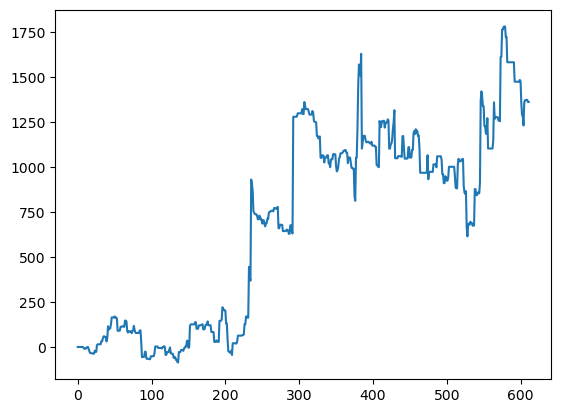

In [57]:
cumulative_returns = np.cumsum(returns)
plt.plot(cumulative_returns)
plt.show()

## Strat-2 RSI

In [58]:
def get_returns1(master_macd, master_rsi, prices):
    returns = []
    intrade = []
    i = 0
    while(i<len(prices)) :
        buy = 0
        buy_rsi = 100.0
        sell = 0
        sell_rsi = 0.0
        for j in range(1,len(prices.columns)):
            if(master_rsi.iloc[i,j]<30):
                if(master_rsi.iloc[i,j]<buy_rsi):
                    buy = j
                    buy_rsi = master_rsi.iloc[i,j]
            elif(master_rsi.iloc[i,j]>70):
                if(master_rsi.iloc[i,j]>sell_rsi):
                    sell = j
                    sell_rsi = master_rsi.iloc[i,j]

        if(len(intrade)==0) :
            returns.append(0)
            
        else :
            b1 = prices.iloc[intrade[0][0],intrade[0][1]]
            s1 = prices.iloc[intrade[0][0],intrade[0][3]]
            b2 = prices.iloc[i,intrade[0][1]]
            s2 = prices.iloc[i,intrade[0][3]]
            r = (((b2-b1))*intrade[0][2]) + ((s1-s2))
            returns.append(r)
            intrade.clear()

        
        if(buy!=0 and sell!=0) :
            buy_quantity = float(prices.iloc[i,sell]/prices.iloc[i,buy])
            l = [i,buy,buy_quantity,sell]
            intrade.append(l)
        
        i = i+1

    return returns, intrade

In [59]:
returns1,intrade1 = get_returns1(master_macd, master_rsi, prices)

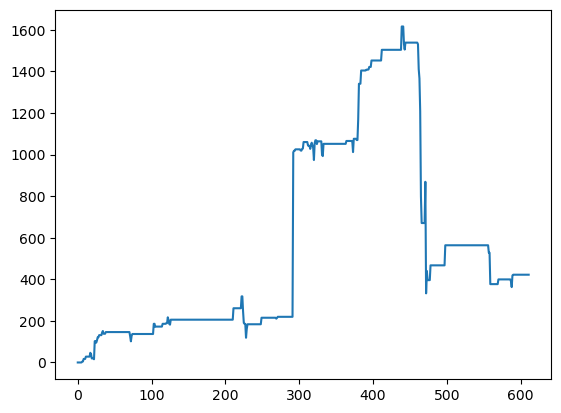

In [60]:
cumulative_returns = np.cumsum(returns1)
plt.plot(cumulative_returns)
plt.show()